# 01. Analysis Seoul CCTV

## 1. 데이터 읽기

In [1]:
import pandas as pd

In [2]:
CCTV_Seoul = pd.read_csv("../data/Seoul_CCTV.csv", encoding="utf-8")

In [3]:
CCTV_Seoul.head()


,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [4]:
CCTV_Seoul.tail()


,기관명,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,2096,1368,218,112,398
21,은평구,2108,1138,224,278,468
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


In [5]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [6]:
CCTV_Seoul.columns[0]


'기관명'

In [7]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]: "구별"}, inplace=True)

In [8]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [9]:
pop_Seoul = pd.read_excel(
    "../data/Seoul_Population.xls", header=2, usecols="B, D, G, J, N"
)

In [10]:
pop_Seoul.head()


,자치구,계,계.1,계.2,65세이상고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


In [11]:
pop_Seoul.rename(
    columns={
        pop_Seoul.columns[0]: "구별",
        pop_Seoul.columns[1]: "인구수",
        pop_Seoul.columns[2]: "한국인",
        pop_Seoul.columns[3]: "외국인",
        pop_Seoul.columns[4]: "고령자",
    },
    inplace=True,
)

In [12]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


---

## Pandas 기초
- Python에서 R 만큼의 강력한 데이터 핸들링 성능을 제공하는 모듈
- 단일 프로세스에서는 최대 효율
- 코딩 가능하고 응용 가능한 엑셀로 받아들여도 됨

#### Series
- index와 value로 이루어져 있습니다.
- 한 가지 데이터 타입만 가질 수 있습니다.

In [13]:
import pandas as pd

In [14]:
import numpy as np


- pandas는 통상 pd
- numpy는 통상 np

In [15]:
pd.Series([1, 2, 3, 4])

0    1
1    2
2    3
3    4
dtype: int64

In [16]:
pd.Series([1, 2, 3, 4], dtype=np.float64)

0    1.0
1    2.0
2    3.0
3    4.0
dtype: float64

In [17]:
pd.Series([1, 2, 3, 4], dtype=str)

0    1
1    2
2    3
3    4
dtype: object

In [18]:
pd.Series(np.array([1, 2, 3]))

0    1
1    2
2    3
dtype: int32

In [19]:
pd.Series({"key": "Value"})

key    Value
dtype: object

In [20]:
data = pd.Series([1, 2, 3, 4, "5"])
data

0    1
1    2
2    3
3    4
4    5
dtype: object

In [21]:
import pandas as pd
import numpy as np

In [22]:
data = pd.Series([1, 2, 3, 4, "5"])
data

0    1
1    2
2    3
3    4
4    5
dtype: object

In [23]:
data = pd.Series([1, 2, 3, 4])
data

0    1
1    2
2    3
3    4
dtype: int64

In [24]:
data % 2

0    1
1    0
2    1
3    0
dtype: int64

#### 날짜 데이터

In [25]:
dates = pd.date_range("20210101", periods=6)
dates

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06'],
              dtype='datetime64[ns]', freq='D')

### DataFrame
- pd.Series()
        - index, value
- pd.DataFrame()
        - index, value, column

In [26]:
# 표준정규분포에서 샘플링한 난수 생성
data = np.random.randn(6, 4)
data

array([[-0.44879894,  0.31910099,  2.42491829,  0.93334159],
       [-0.40727527, -0.40071846,  0.69634845,  0.39532239],
       [-0.3808268 , -0.20888217, -0.77234361,  1.11710272],
       [ 1.56112149,  0.16904138,  0.10870431, -0.61459422],
       [-0.04501309, -1.62503585, -0.88569099,  0.79925951],
       [-1.89107737, -0.25318316, -0.32321294, -0.76566886]])

In [27]:
df = pd.DataFrame(data, index=dates, columns=["A", "B", "C", "D"])
df                                         

,A,B,C,D
2021-01-01,-0.448799,0.319101,2.424918,0.933342
2021-01-02,-0.407275,-0.400718,0.696348,0.395322
2021-01-03,-0.380827,-0.208882,-0.772344,1.117103
2021-01-04,1.561121,0.169041,0.108704,-0.614594
2021-01-05,-0.045013,-1.625036,-0.885691,0.799260
2021-01-06,-1.891077,-0.253183,-0.323213,-0.765669


### 데이터 프레임 정보 탐색
- df.head()

In [28]:
df.head(3)

,A,B,C,D
2021-01-01,-0.448799,0.319101,2.424918,0.933342
2021-01-02,-0.407275,-0.400718,0.696348,0.395322
2021-01-03,-0.380827,-0.208882,-0.772344,1.117103


- df.tail()

In [29]:
df.tail()

,A,B,C,D
2021-01-02,-0.407275,-0.400718,0.696348,0.395322
2021-01-03,-0.380827,-0.208882,-0.772344,1.117103
2021-01-04,1.561121,0.169041,0.108704,-0.614594
2021-01-05,-0.045013,-1.625036,-0.885691,0.799260
2021-01-06,-1.891077,-0.253183,-0.323213,-0.765669


In [30]:
df.index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06'],
              dtype='datetime64[ns]', freq='D')

In [31]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [32]:
df.values

array([[-0.44879894,  0.31910099,  2.42491829,  0.93334159],
       [-0.40727527, -0.40071846,  0.69634845,  0.39532239],
       [-0.3808268 , -0.20888217, -0.77234361,  1.11710272],
       [ 1.56112149,  0.16904138,  0.10870431, -0.61459422],
       [-0.04501309, -1.62503585, -0.88569099,  0.79925951],
       [-1.89107737, -0.25318316, -0.32321294, -0.76566886]])

- df.info() : 데이터 프레임의 기본 정보 확인

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2021-01-01 to 2021-01-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


- df.describe() : 데이터 프레임의 기술통계 정보 확인

In [34]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.268645,-0.333280,0.208121,0.310794
std,1.104047,0.688912,1.233085,0.812226
min,-1.891077,-1.625036,-0.885691,-0.765669
25%,-0.438418,-0.363835,-0.660061,-0.362115
50%,-0.394051,-0.231033,-0.107254,0.597291
75%,-0.128967,0.074560,0.549437,0.899821
max,1.561121,0.319101,2.424918,1.117103


### 데이터 정렬
- sort_values()
- 특정 컬럼(열)을 기준으로 데이터를 정렬합니다

In [35]:
df

,A,B,C,D
2021-01-01,-0.448799,0.319101,2.424918,0.933342
2021-01-02,-0.407275,-0.400718,0.696348,0.395322
2021-01-03,-0.380827,-0.208882,-0.772344,1.117103
2021-01-04,1.561121,0.169041,0.108704,-0.614594
2021-01-05,-0.045013,-1.625036,-0.885691,0.799260
2021-01-06,-1.891077,-0.253183,-0.323213,-0.765669


In [36]:
df.sort_values(by="B", ascending=False, inplace=True)

In [37]:
df

,A,B,C,D
2021-01-01,-0.448799,0.319101,2.424918,0.933342
2021-01-04,1.561121,0.169041,0.108704,-0.614594
2021-01-03,-0.380827,-0.208882,-0.772344,1.117103
2021-01-06,-1.891077,-0.253183,-0.323213,-0.765669
2021-01-02,-0.407275,-0.400718,0.696348,0.395322
2021-01-05,-0.045013,-1.625036,-0.885691,0.799260


### 데이터 선택

In [38]:
df

,A,B,C,D
2021-01-01,-0.448799,0.319101,2.424918,0.933342
2021-01-04,1.561121,0.169041,0.108704,-0.614594
2021-01-03,-0.380827,-0.208882,-0.772344,1.117103
2021-01-06,-1.891077,-0.253183,-0.323213,-0.765669
2021-01-02,-0.407275,-0.400718,0.696348,0.395322
2021-01-05,-0.045013,-1.625036,-0.885691,0.799260


In [39]:
# 한 개 컬럼 선택
df["A"]

2021-01-01   -0.448799
2021-01-04    1.561121
2021-01-03   -0.380827
2021-01-06   -1.891077
2021-01-02   -0.407275
2021-01-05   -0.045013
Name: A, dtype: float64

In [40]:
type(df["A"])

pandas.core.series.Series

In [41]:
df.A

2021-01-01   -0.448799
2021-01-04    1.561121
2021-01-03   -0.380827
2021-01-06   -1.891077
2021-01-02   -0.407275
2021-01-05   -0.045013
Name: A, dtype: float64

In [42]:
df = pd.DataFrame(data, index=dates, columns=["A", "B", "C", "D"])
df        

,A,B,C,D
2021-01-01,-0.448799,0.319101,2.424918,0.933342
2021-01-02,-0.407275,-0.400718,0.696348,0.395322
2021-01-03,-0.380827,-0.208882,-0.772344,1.117103
2021-01-04,1.561121,0.169041,0.108704,-0.614594
2021-01-05,-0.045013,-1.625036,-0.885691,0.799260
2021-01-06,-1.891077,-0.253183,-0.323213,-0.765669


In [43]:
df.D

2021-01-01    0.933342
2021-01-02    0.395322
2021-01-03    1.117103
2021-01-04   -0.614594
2021-01-05    0.799260
2021-01-06   -0.765669
Freq: D, Name: D, dtype: float64

In [44]:
# 두 개 이상 컬럼 선택
df[["A", "B"]]

,A,B
2021-01-01,-0.448799,0.319101
2021-01-02,-0.407275,-0.400718
2021-01-03,-0.380827,-0.208882
2021-01-04,1.561121,0.169041
2021-01-05,-0.045013,-1.625036
2021-01-06,-1.891077,-0.253183


### offset index 
- [n:m] : n부터 m-1 까지
- 인덱스나 컬럼의 이름으로 slice 하는 경우는 끝을 포함합니다

In [45]:
df

,A,B,C,D
2021-01-01,-0.448799,0.319101,2.424918,0.933342
2021-01-02,-0.407275,-0.400718,0.696348,0.395322
2021-01-03,-0.380827,-0.208882,-0.772344,1.117103
2021-01-04,1.561121,0.169041,0.108704,-0.614594
2021-01-05,-0.045013,-1.625036,-0.885691,0.799260
2021-01-06,-1.891077,-0.253183,-0.323213,-0.765669


In [46]:
df[0:3]

,A,B,C,D
2021-01-01,-0.448799,0.319101,2.424918,0.933342
2021-01-02,-0.407275,-0.400718,0.696348,0.395322
2021-01-03,-0.380827,-0.208882,-0.772344,1.117103


In [47]:
df["20210101":"20210104"]

,A,B,C,D
2021-01-01,-0.448799,0.319101,2.424918,0.933342
2021-01-02,-0.407275,-0.400718,0.696348,0.395322
2021-01-03,-0.380827,-0.208882,-0.772344,1.117103
2021-01-04,1.561121,0.169041,0.108704,-0.614594


- loc : location
- index 이름으로 특정 행, 열을 선택합니다

In [48]:
df.loc[:, ["A","B"]]

,A,B
2021-01-01,-0.448799,0.319101
2021-01-02,-0.407275,-0.400718
2021-01-03,-0.380827,-0.208882
2021-01-04,1.561121,0.169041
2021-01-05,-0.045013,-1.625036
2021-01-06,-1.891077,-0.253183


In [49]:
df.loc["20210102":"20210104", ["A", "D"]]

,A,D
2021-01-02,-0.407275,0.395322
2021-01-03,-0.380827,1.117103
2021-01-04,1.561121,-0.614594


In [50]:
df.loc["20210102":"20210104", "A":"D"]

,A,B,C,D
2021-01-02,-0.407275,-0.400718,0.696348,0.395322
2021-01-03,-0.380827,-0.208882,-0.772344,1.117103
2021-01-04,1.561121,0.169041,0.108704,-0.614594


In [51]:
df.loc["20210102", ["A", "B"]]

A   -0.407275
B   -0.400718
Name: 2021-01-02 00:00:00, dtype: float64

- iloc : integer location
    - 컴퓨터가 인식하는 인덱스 값으로 선택

In [52]:
df

,A,B,C,D
2021-01-01,-0.448799,0.319101,2.424918,0.933342
2021-01-02,-0.407275,-0.400718,0.696348,0.395322
2021-01-03,-0.380827,-0.208882,-0.772344,1.117103
2021-01-04,1.561121,0.169041,0.108704,-0.614594
2021-01-05,-0.045013,-1.625036,-0.885691,0.799260
2021-01-06,-1.891077,-0.253183,-0.323213,-0.765669


In [53]:
df.iloc[3]

A    1.561121
B    0.169041
C    0.108704
D   -0.614594
Name: 2021-01-04 00:00:00, dtype: float64

In [54]:
df.iloc[3, 2]

0.10870430980019781

In [55]:
df.iloc[3:5, 0:2]

,A,B
2021-01-04,1.561121,0.169041
2021-01-05,-0.045013,-1.625036


In [56]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2021-01-02,-0.407275,0.696348
2021-01-03,-0.380827,-0.772344
2021-01-05,-0.045013,-0.885691


In [57]:
df.iloc[:, 1:3]

,B,C
2021-01-01,0.319101,2.424918
2021-01-02,-0.400718,0.696348
2021-01-03,-0.208882,-0.772344
2021-01-04,0.169041,0.108704
2021-01-05,-1.625036,-0.885691
2021-01-06,-0.253183,-0.323213


### condition

In [58]:
df

,A,B,C,D
2021-01-01,-0.448799,0.319101,2.424918,0.933342
2021-01-02,-0.407275,-0.400718,0.696348,0.395322
2021-01-03,-0.380827,-0.208882,-0.772344,1.117103
2021-01-04,1.561121,0.169041,0.108704,-0.614594
2021-01-05,-0.045013,-1.625036,-0.885691,0.799260
2021-01-06,-1.891077,-0.253183,-0.323213,-0.765669


In [59]:
# A 컬럼에서 0보다 큰 숫자(양수)만 선택

df["A"] > 0

2021-01-01    False
2021-01-02    False
2021-01-03    False
2021-01-04     True
2021-01-05    False
2021-01-06    False
Freq: D, Name: A, dtype: bool

In [60]:
df[df["A"] > 0]

,A,B,C,D
2021-01-04,1.561121,0.169041,0.108704,-0.614594


In [61]:
df[df > 0]

,A,B,C,D
2021-01-01,NaN,0.319101,2.424918,0.933342
2021-01-02,NaN,NaN,0.696348,0.395322
2021-01-03,NaN,NaN,NaN,1.117103
2021-01-04,1.561121,0.169041,0.108704,NaN
2021-01-05,NaN,NaN,NaN,0.799260
2021-01-06,NaN,NaN,NaN,NaN


- NaN : Not a Number

### 컬럼 추가
- 기존 컬럼이 없으면 추가
- 기존 칼럼이 있으면 수정

In [62]:
df

,A,B,C,D
2021-01-01,-0.448799,0.319101,2.424918,0.933342
2021-01-02,-0.407275,-0.400718,0.696348,0.395322
2021-01-03,-0.380827,-0.208882,-0.772344,1.117103
2021-01-04,1.561121,0.169041,0.108704,-0.614594
2021-01-05,-0.045013,-1.625036,-0.885691,0.799260
2021-01-06,-1.891077,-0.253183,-0.323213,-0.765669


In [63]:
df["E"] = ["one", "one", "two", "three", "four", "six"]

In [64]:
df

,A,B,C,D,E
2021-01-01,-0.448799,0.319101,2.424918,0.933342,one
2021-01-02,-0.407275,-0.400718,0.696348,0.395322,one
2021-01-03,-0.380827,-0.208882,-0.772344,1.117103,two
2021-01-04,1.561121,0.169041,0.108704,-0.614594,three
2021-01-05,-0.045013,-1.625036,-0.885691,0.799260,four
2021-01-06,-1.891077,-0.253183,-0.323213,-0.765669,six


- isin() : 특정 요소가 있는지 확인

In [65]:
df["E"].isin(["two"])

2021-01-01    False
2021-01-02    False
2021-01-03     True
2021-01-04    False
2021-01-05    False
2021-01-06    False
Freq: D, Name: E, dtype: bool

In [66]:
df["E"].isin(["one" ,"two" ,"three"])

2021-01-01     True
2021-01-02     True
2021-01-03     True
2021-01-04     True
2021-01-05    False
2021-01-06    False
Freq: D, Name: E, dtype: bool

### 특정 칼럼 제거
- del
- drop

In [67]:
df

,A,B,C,D,E
2021-01-01,-0.448799,0.319101,2.424918,0.933342,one
2021-01-02,-0.407275,-0.400718,0.696348,0.395322,one
2021-01-03,-0.380827,-0.208882,-0.772344,1.117103,two
2021-01-04,1.561121,0.169041,0.108704,-0.614594,three
2021-01-05,-0.045013,-1.625036,-0.885691,0.799260,four
2021-01-06,-1.891077,-0.253183,-0.323213,-0.765669,six


In [68]:
del df["E"]
df

,A,B,C,D
2021-01-01,-0.448799,0.319101,2.424918,0.933342
2021-01-02,-0.407275,-0.400718,0.696348,0.395322
2021-01-03,-0.380827,-0.208882,-0.772344,1.117103
2021-01-04,1.561121,0.169041,0.108704,-0.614594
2021-01-05,-0.045013,-1.625036,-0.885691,0.799260
2021-01-06,-1.891077,-0.253183,-0.323213,-0.765669


In [69]:
df.drop(["D"], axis=1) # axis=0 가로, axis=1 세로

,A,B,C
2021-01-01,-0.448799,0.319101,2.424918
2021-01-02,-0.407275,-0.400718,0.696348
2021-01-03,-0.380827,-0.208882,-0.772344
2021-01-04,1.561121,0.169041,0.108704
2021-01-05,-0.045013,-1.625036,-0.885691
2021-01-06,-1.891077,-0.253183,-0.323213


In [70]:
df.drop(["20210104"])

,A,B,C,D
2021-01-01,-0.448799,0.319101,2.424918,0.933342
2021-01-02,-0.407275,-0.400718,0.696348,0.395322
2021-01-03,-0.380827,-0.208882,-0.772344,1.117103
2021-01-05,-0.045013,-1.625036,-0.885691,0.799260
2021-01-06,-1.891077,-0.253183,-0.323213,-0.765669


### apply()

In [71]:
df

,A,B,C,D
2021-01-01,-0.448799,0.319101,2.424918,0.933342
2021-01-02,-0.407275,-0.400718,0.696348,0.395322
2021-01-03,-0.380827,-0.208882,-0.772344,1.117103
2021-01-04,1.561121,0.169041,0.108704,-0.614594
2021-01-05,-0.045013,-1.625036,-0.885691,0.799260
2021-01-06,-1.891077,-0.253183,-0.323213,-0.765669


In [72]:
df["A"].apply("sum")

-1.6118699672675305

In [73]:
df["A"].apply("mean")

-0.2686449945445884

In [74]:
df["A"].apply("min"), df["A"].apply("max")

(-1.8910773684166187, 1.5611214909687134)

In [75]:
df[["A", "D"]].apply("sum")

A   -1.611870
D    1.864763
dtype: float64

In [76]:
df["A"].apply(np.sum)

2021-01-01   -0.448799
2021-01-02   -0.407275
2021-01-03   -0.380827
2021-01-04    1.561121
2021-01-05   -0.045013
2021-01-06   -1.891077
Freq: D, Name: A, dtype: float64

In [77]:
df["A"].apply(np.mean)

2021-01-01   -0.448799
2021-01-02   -0.407275
2021-01-03   -0.380827
2021-01-04    1.561121
2021-01-05   -0.045013
2021-01-06   -1.891077
Freq: D, Name: A, dtype: float64

In [78]:
df["A"].apply(np.std)

2021-01-01    0.0
2021-01-02    0.0
2021-01-03    0.0
2021-01-04    0.0
2021-01-05    0.0
2021-01-06    0.0
Freq: D, Name: A, dtype: float64

In [79]:
df.apply(np.sum)

A   -1.611870
B   -1.999677
C    1.248724
D    1.864763
dtype: float64

In [80]:
df

,A,B,C,D
2021-01-01,-0.448799,0.319101,2.424918,0.933342
2021-01-02,-0.407275,-0.400718,0.696348,0.395322
2021-01-03,-0.380827,-0.208882,-0.772344,1.117103
2021-01-04,1.561121,0.169041,0.108704,-0.614594
2021-01-05,-0.045013,-1.625036,-0.885691,0.799260
2021-01-06,-1.891077,-0.253183,-0.323213,-0.765669


In [81]:
def plusminus(num):
    return "plus" if num > 0 else "minus"

In [82]:
df["A"].apply(plusminus)

2021-01-01    minus
2021-01-02    minus
2021-01-03    minus
2021-01-04     plus
2021-01-05    minus
2021-01-06    minus
Freq: D, Name: A, dtype: object

In [83]:
df["A"].apply(lambda num: "plus" if num > 0 else "minus")

2021-01-01    minus
2021-01-02    minus
2021-01-03    minus
2021-01-04     plus
2021-01-05    minus
2021-01-06    minus
Freq: D, Name: A, dtype: object

---

## 2. CCTV 데이터 훑어보기

In [84]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [85]:
CCTV_Seoul.tail()

,구별,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,2096,1368,218,112,398
21,은평구,2108,1138,224,278,468
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


In [86]:
CCTV_Seoul.sort_values(by="소계", ascending=True).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109


In [87]:
CCTV_Seoul.sort_values(by="소계", ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468


In [88]:
# 기존 컬럼이 없으면 추가, 있으면 수정
CCTV_Seoul["최근증가율"] = (
    (CCTV_Seoul["2016년"] + CCTV_Seoul["2015년"] + CCTV_Seoul["2014년"]) / CCTV_Seoul["2013년도 이전"] * 100
)

CCTV_Seoul.sort_values(by="최근증가율", ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765


## 3. 인구현황 데이터 훌어보기

In [89]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


In [90]:
pop_Seoul.tail()

,구별,인구수,한국인,외국인,고령자
21,관악구,520929,503297,17632,70046
22,서초구,445401,441102,4299,53205
23,강남구,561052,556164,4888,65060
24,송파구,671173,664496,6677,76582
25,강동구,440359,436223,4136,56161


In [91]:
pop_Seoul.drop([0], axis=0, inplace=True)

In [92]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273
5,광진구,372298,357703,14595,43953


In [93]:
pop_Seoul["구별"].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [94]:
len(pop_Seoul["구별"].unique())

25

In [95]:
# 외국인비율, 고령자비율

pop_Seoul["외국인비율"] = pop_Seoul["외국인"] / pop_Seoul["인구수"] * 100
pop_Seoul["고령자비율"] = pop_Seoul["고령자"] / pop_Seoul["인구수"] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164257,154770,9487,26182,5.775705,15.939656
2,중구,134593,125709,8884,21384,6.600640,15.887899
3,용산구,244444,229161,15283,36882,6.252148,15.088118
4,성동구,312711,304808,7903,41273,2.527254,13.198448
5,광진구,372298,357703,14595,43953,3.920247,11.805865


In [96]:
pop_Seoul.sort_values(["인구수"], ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,671173,664496,6677,76582,0.994825,11.410173
16,강서구,608255,601691,6564,76032,1.079153,12.500021
23,강남구,561052,556164,4888,65060,0.871220,11.596073
11,노원구,558075,554403,3672,74243,0.657976,13.303409
21,관악구,520929,503297,17632,70046,3.384722,13.446362


In [97]:
pop_Seoul.sort_values(["외국인"], ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402024,368550,33474,53981,8.326369,13.427308
17,구로구,441559,410742,30817,58794,6.979135,13.315095
18,금천구,253491,235154,18337,34170,7.233787,13.479769
21,관악구,520929,503297,17632,70046,3.384722,13.446362
6,동대문구,366011,350647,15364,55718,4.197688,15.223040


In [98]:
pop_Seoul.sort_values(["외국인비율"], ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402024,368550,33474,53981,8.326369,13.427308
18,금천구,253491,235154,18337,34170,7.233787,13.479769
17,구로구,441559,410742,30817,58794,6.979135,13.315095
2,중구,134593,125709,8884,21384,6.600640,15.887899
3,용산구,244444,229161,15283,36882,6.252148,15.088118


In [99]:
pop_Seoul.sort_values(by="고령자", ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,671173,664496,6677,76582,0.994825,11.410173
16,강서구,608255,601691,6564,76032,1.079153,12.500021
12,은평구,491202,486794,4408,74559,0.897390,15.178888
11,노원구,558075,554403,3672,74243,0.657976,13.303409
21,관악구,520929,503297,17632,70046,3.384722,13.446362


In [100]:
pop_Seoul.sort_values(by="고령자비율", ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,328002,324479,3523,56530,1.074079,17.234651
1,종로구,164257,154770,9487,26182,5.775705,15.939656
2,중구,134593,125709,8884,21384,6.600640,15.887899
10,도봉구,346234,344166,2068,53488,0.597284,15.448512
6,동대문구,366011,350647,15364,55718,4.197688,15.223040


## 4. 두 데이터 합치기

---

### Pandas에서 데이터 프레임을 병합하는 방법
- pd.concat()
- pd.merge()
- pd.join()

In [101]:
 #딕셔너리 안의 리스트 형태 -> 열 값 기준으로 데이터 들어감

left = pd.DataFrame({
    "key": ["K0", "K4", "K2", "K3"],
    "A": ["A0", "A1", "A2", "A3"],
    "B" : ["B0", "B1", "B2", "B3"]
})
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [102]:
#리스트 안의 딕셔너리 형태 -> 행 값 기준으로 데이터 들어감

right = pd.DataFrame([
    {"key":"K0", "C":"C0", "D":"D0"},
    {"key":"K1", "C":"C1", "D":"D1"},
    {"key":"K2", "C":"C2", "D":"D2"},
    {"key":"K3", "C":"C3", "D":"D3"},
])

#### pd.merge()
- 두 데이터 프레임에서 컬럼이나 인덱스를 기준으로 잡고 병합하는 방법
- 기준이 되는 컬럼이나 인덱스를 키값이라고 합니다
- 기준이 되는 키값은 두 데이터 프레임에 모두 포함되어 있어야 합니다

In [103]:
pd.merge(left, right, on="key") # how="inner" (교집합)

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [104]:
pd.merge(left, right, how="left", on="key") 

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [105]:
pd.merge(left, right, how="right", on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,NaN,NaN,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [106]:
pd.merge(left, right, how="outer", on="key") #합집합

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


---

In [107]:
CCTV_Seoul.head(1)
pop_Seoul.head(1)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164257,154770,9487,26182,5.775705,15.939656


In [108]:
CCTV_Seoul.head(1)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195


In [109]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on="구별")
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,379,99,155,377,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,369,120,138,204,125.203252,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,388,258,184,81,134.793814,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,846,260,390,613,149.290780,520929,503297,17632,70046,3.384722,13.446362


#### 년도별 데이터 컬럼 삭제
- del
- drop()

In [110]:
del data_result["2013년도 이전"]

In [111]:
del data_result["2014년"]

In [112]:
data_result.head(3)

,구별,소계,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,584,932,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,155,377,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,138,204,125.203252,328002,324479,3523,56530,1.074079,17.234651


In [113]:
data_result.drop(["2015년", "2016년"], axis=1, inplace=True)
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362


#### 인덱스 변경
- set_index()
- 선택한 컬럼을 데이터 프레임의 인덱스로 지정

In [114]:
data_result.set_index("구별", inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362


#### 상관계수
- corr()
- correlation 의 약자
- 상관계수가 0.2 이상인 데이터를 비교

In [115]:
data_result.corr()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
소계,1.000000,-0.264378,0.232555,0.227852,0.030421,0.163905,-0.045956,-0.267841
최근증가율,-0.264378,1.000000,-0.097165,-0.086341,-0.156421,-0.072251,-0.047102,0.190396
인구수,0.232555,-0.097165,1.000000,0.998151,-0.167243,0.936737,-0.601076,-0.637414
한국인,0.227852,-0.086341,0.998151,1.000000,-0.226853,0.936155,-0.645463,-0.628360
외국인,0.030421,-0.156421,-0.167243,-0.226853,1.000000,-0.175318,0.838612,-0.021147
고령자,0.163905,-0.072251,0.936737,0.936155,-0.175318,1.000000,-0.620300,-0.348840
외국인비율,-0.045956,-0.047102,-0.601076,-0.645463,0.838612,-0.620300,1.000000,0.242816
고령자비율,-0.267841,0.190396,-0.637414,-0.628360,-0.021147,-0.348840,0.242816,1.000000


In [116]:
data_result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   소계      25 non-null     int64  
 1   최근증가율   25 non-null     float64
 2   인구수     25 non-null     int64  
 3   한국인     25 non-null     int64  
 4   외국인     25 non-null     int64  
 5   고령자     25 non-null     int64  
 6   외국인비율   25 non-null     float64
 7   고령자비율   25 non-null     float64
dtypes: float64(3), int64(5)
memory usage: 1.8+ KB


In [117]:
data_result["CCTV비율"] = data_result["소계"] / data_result["인구수"]
data_result["CCTV비율"] = data_result["CCTV비율"] * 100

In [118]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


In [119]:
data_result.sort_values(by="CCTV비율", ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
종로구,1619,248.922414,164257,154770,9487,26182,5.775705,15.939656,0.985651
용산구,2096,53.216374,244444,229161,15283,36882,6.252148,15.088118,0.857456
중구,1023,147.699758,134593,125709,8884,21384,6.600640,15.887899,0.760069
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
금천구,1348,100.000000,253491,235154,18337,34170,7.233787,13.479769,0.531774


In [120]:
data_result.sort_values(by="CCTV비율", ascending=True).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
송파구,1081,104.347826,671173,664496,6677,76582,0.994825,11.410173,0.161061
중랑구,916,79.960707,412780,408226,4554,59262,1.103251,14.356800,0.221910
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
광진구,878,53.228621,372298,357703,14595,43953,3.920247,11.805865,0.235833


# matplotlib 기초

In [121]:
import matplotlib.pyplot as plt
from matplotlib import rc

rc("font", family="malgun gothic")
plt.rcParams['axes.unicode_minus'] = False
# matplotlib inline
get_ipython().run_line_magic("matplotlib", "inline")


matplotlib 그래프 기본 형태

```
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.show
```

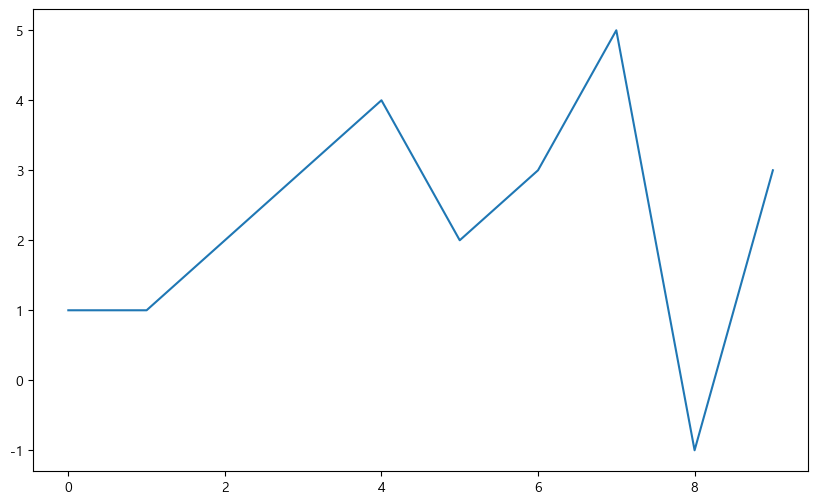

In [122]:
plt.figure(figsize=(10, 6))
plt.plot([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 1, 2, 3, 4, 2, 3, 5, -1, 3])
plt.show()

### 예제1: 그래프 기초

#### 삼각함수 그리기
- np.arrange(a, b, s): a부터 b까지 s간격
- np.sin(value)

In [123]:
import numpy as np

t = np.arange(0, 12, 0.01)
y = np.sin(t)

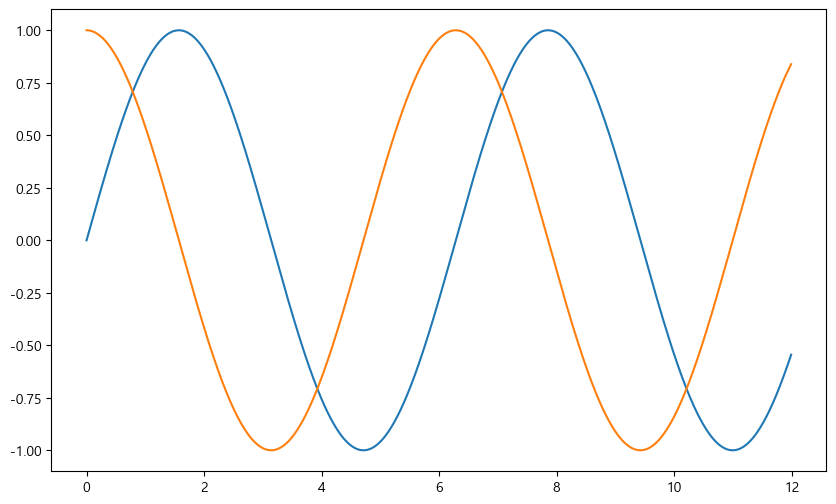

In [124]:
plt.figure(figsize=(10, 6))
plt.plot(t, np.sin(t))
plt.plot(t, np.cos(t))
plt.show()

- 1. 격자무늬 추가
- 2. 그래프 제목 추가
- 3. x축, y축 제목 추가
- 4. 주황색, 파란색 선 데이터 의미 구분

In [137]:
def drawGraph() :

    plt.figure(figsize=(10, 6))
    plt.plot(t, np.sin(t), label="sin")
    plt.plot(t, np.cos(t), label="cos")
    plt.grid(True)
    plt.legend(loc=2) # 범례
    plt.title("Example of sinewave")
    plt.xlabel("time")
    plt.ylabel("Amplitude") # 진폭
    plt.show()

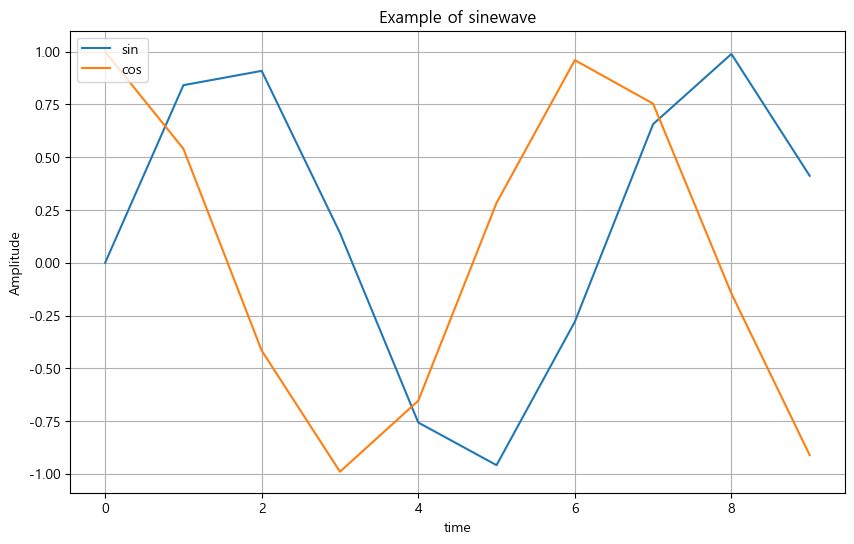

In [138]:
drawGraph()

In [127]:
t = np.arange(0, 5, 0.5)
t

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

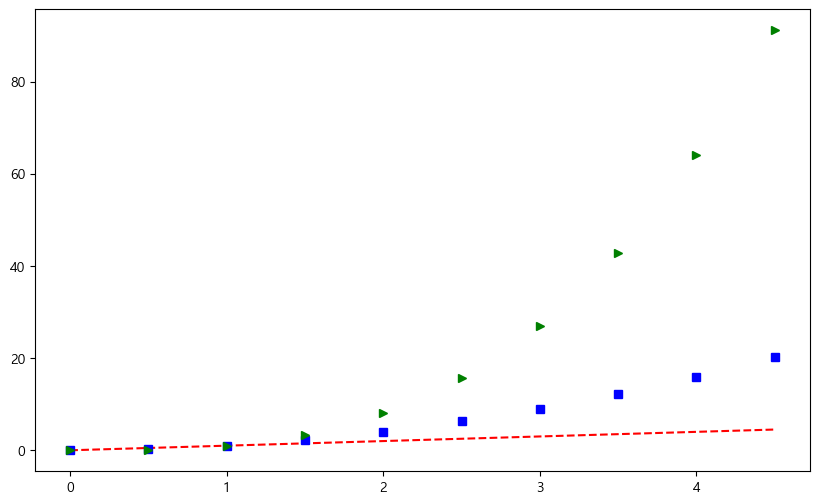

In [128]:
plt.figure(figsize=(10, 6))
plt.plot(t, t, "r--") # red ------
plt.plot(t, t ** 2, "bs")
plt.plot(t, t ** 3, "g>")
plt.show()

In [129]:
# t = [0, 1, 2, 3, 4, ,5, 6]
t = list(range(0, 7))
y = [1, 4, 5, 8, 9, 5, 3]

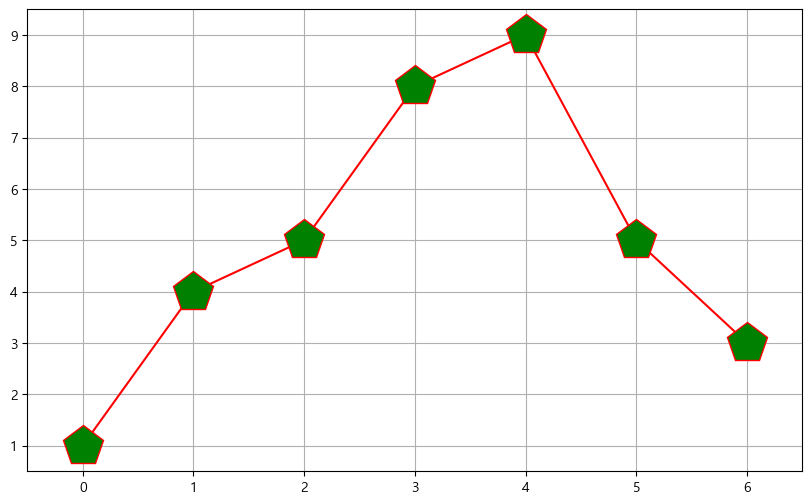

In [130]:
def drawGraph():

    plt.figure(figsize=(10, 6))
    plt.grid(True)
    plt.plot(
        t, y,
        color="red",
        linestyle="-",
        marker="p",
        markerfacecolor="green",
        markersize=30,
    )

    plt.xlim([-0.5, 6.5])
    plt.ylim([0.5, 9.5])
    plt.show()
    
drawGraph()

### 예제3: scatter plot

In [131]:
t = np.array(range(0, 10))
y = np.array([9, 8, 7, 9, 8, 3, 2, 4, 3, 4])

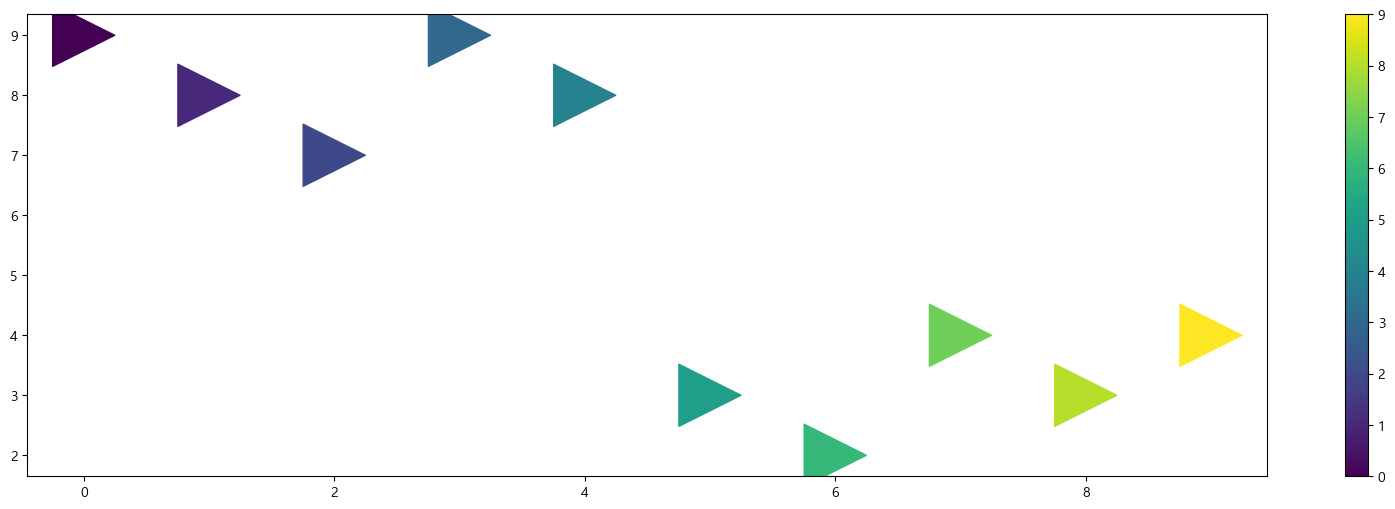

In [132]:
colormap = t

def drawGraph():

    plt.figure(figsize=(20, 6))
    plt.scatter(t, y, s=2000, c=colormap, marker=">")
    plt.colorbar()
    plt.show()
    
drawGraph()

### 예제4: Pandas에서 plot 그리기
- matplotlib 을 가져와서 사용합니다

In [133]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


<AxesSubplot: xlabel='구별'>

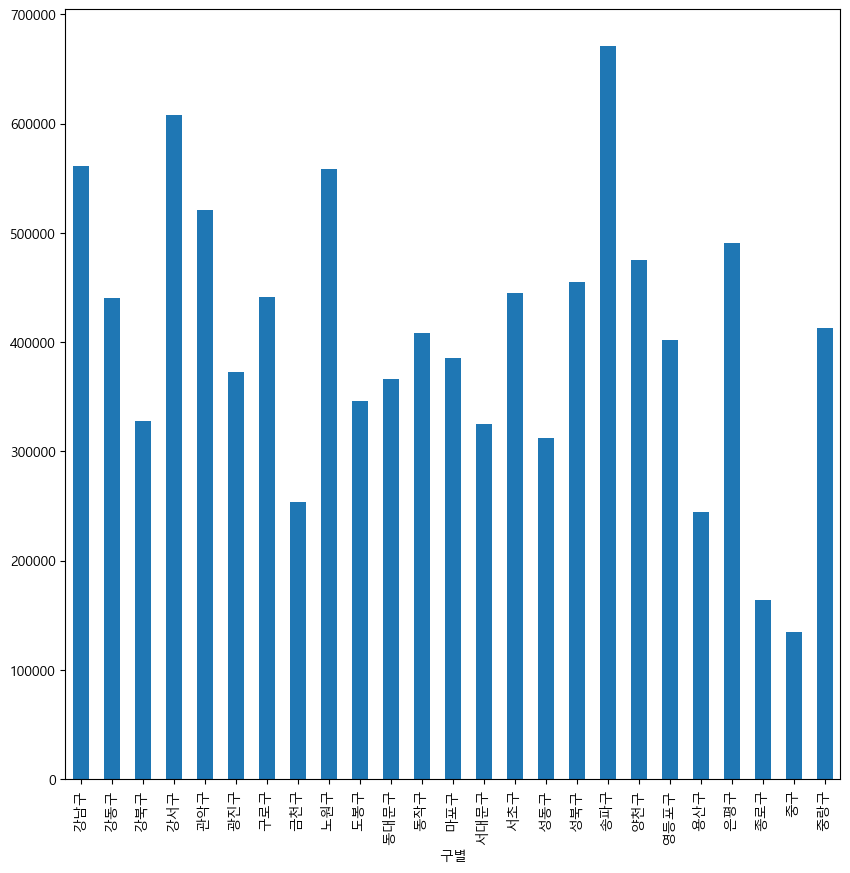

In [134]:
data_result["인구수"].plot(kind="bar", figsize=(10, 10))

<AxesSubplot: ylabel='구별'>

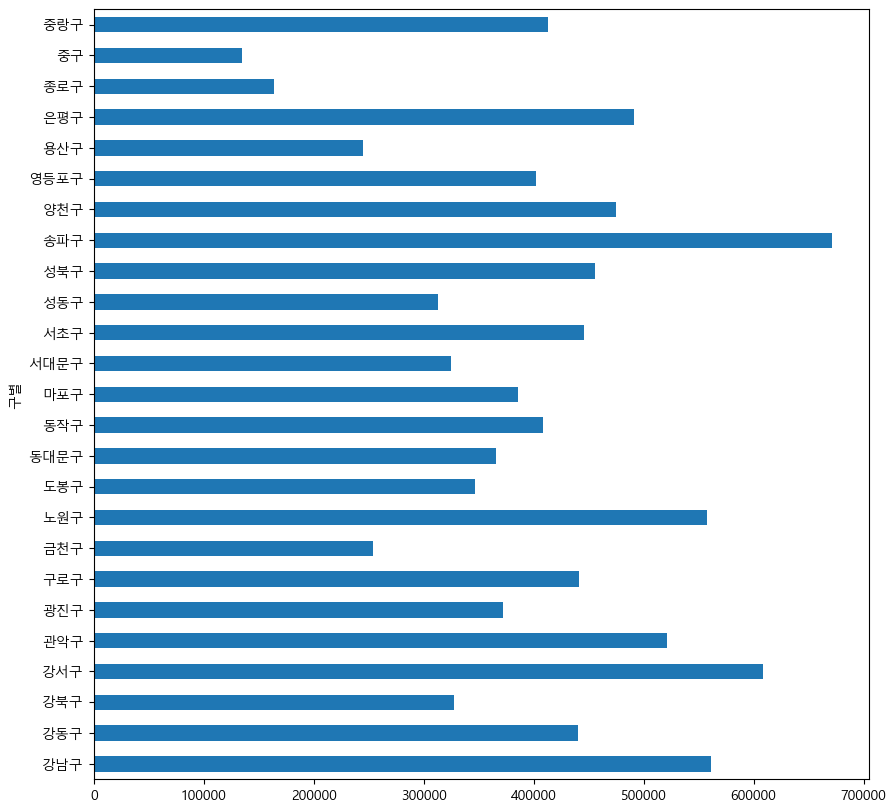

In [135]:
data_result["인구수"].plot(kind="barh", figsize=(10, 10))

---

## 5. 데이터 시각화

In [149]:
import matplotlib.pyplot as plt
# import matplotlib as mpl
from matplotlib import rc

plt.rcParams["axes.unicode_minus"] = False # 마이너스 부호
rc("font", family="malgun gothic")
# %matplotlib inline
get_ipython().run_line_magic("matplotlib", "inline")

In [140]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


#### 소계 컬럼 시각화

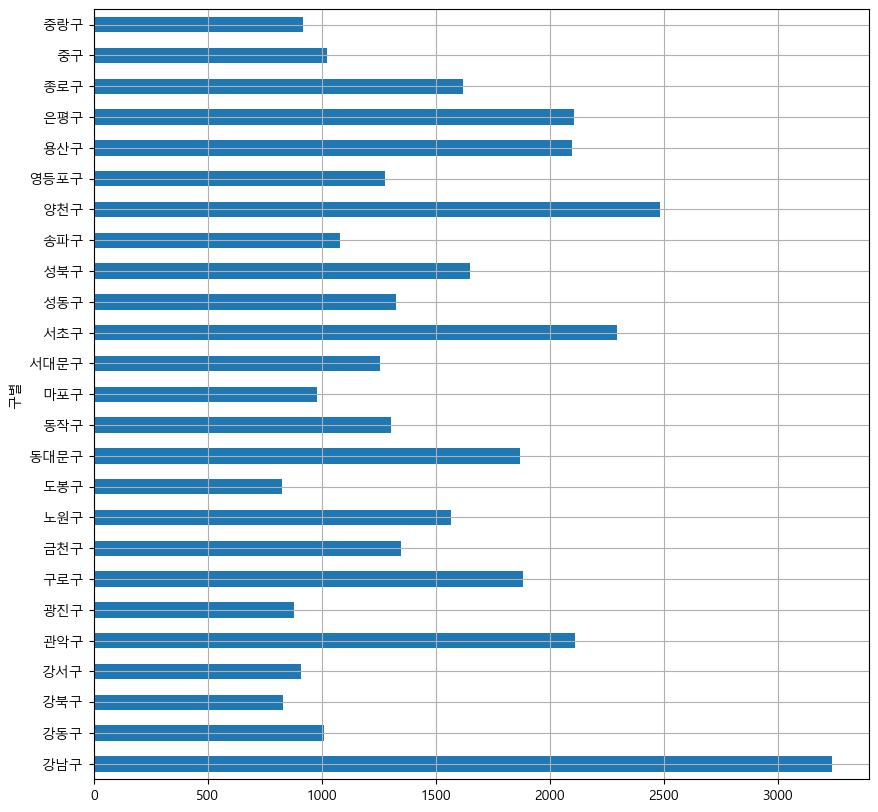

In [141]:
data_result["소계"].plot(kind="barh", grid=True, figsize=(10, 10));

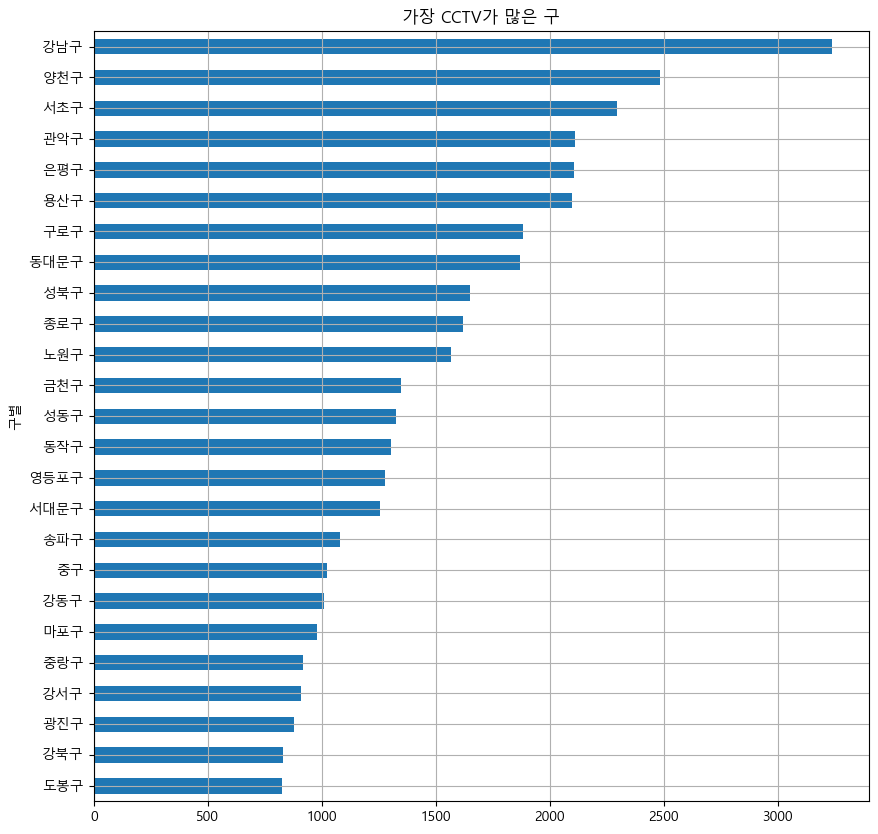

In [146]:
def drawGraph():
    data_result["소계"].sort_values().plot(
        kind="barh", grid=True, title="가장 CCTV가 많은 구", figsize=(10, 10)
    );
drawGraph()

In [147]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


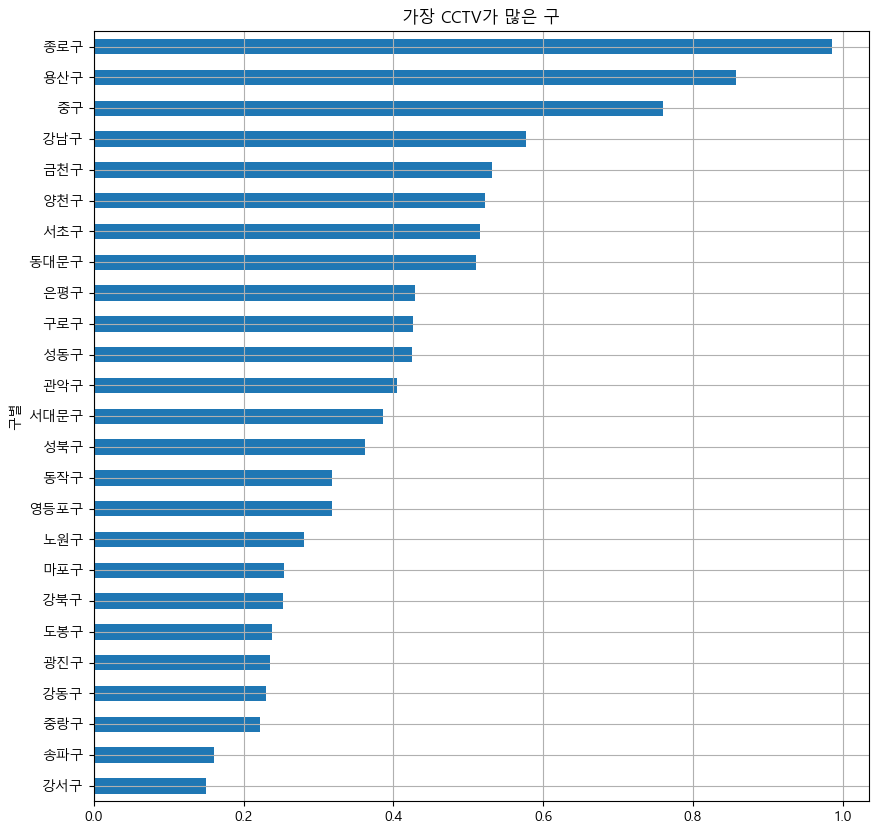

In [148]:
def drawGraph():
    data_result["CCTV비율"].sort_values().plot(
        kind="barh", grid=True, title="가장 CCTV가 많은 구", figsize=(10, 10)
    );
drawGraph()

## 6. 데이터 경향 표시

In [150]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


#### 인구수와 소계 컬럼으로 scatter plot 그리기

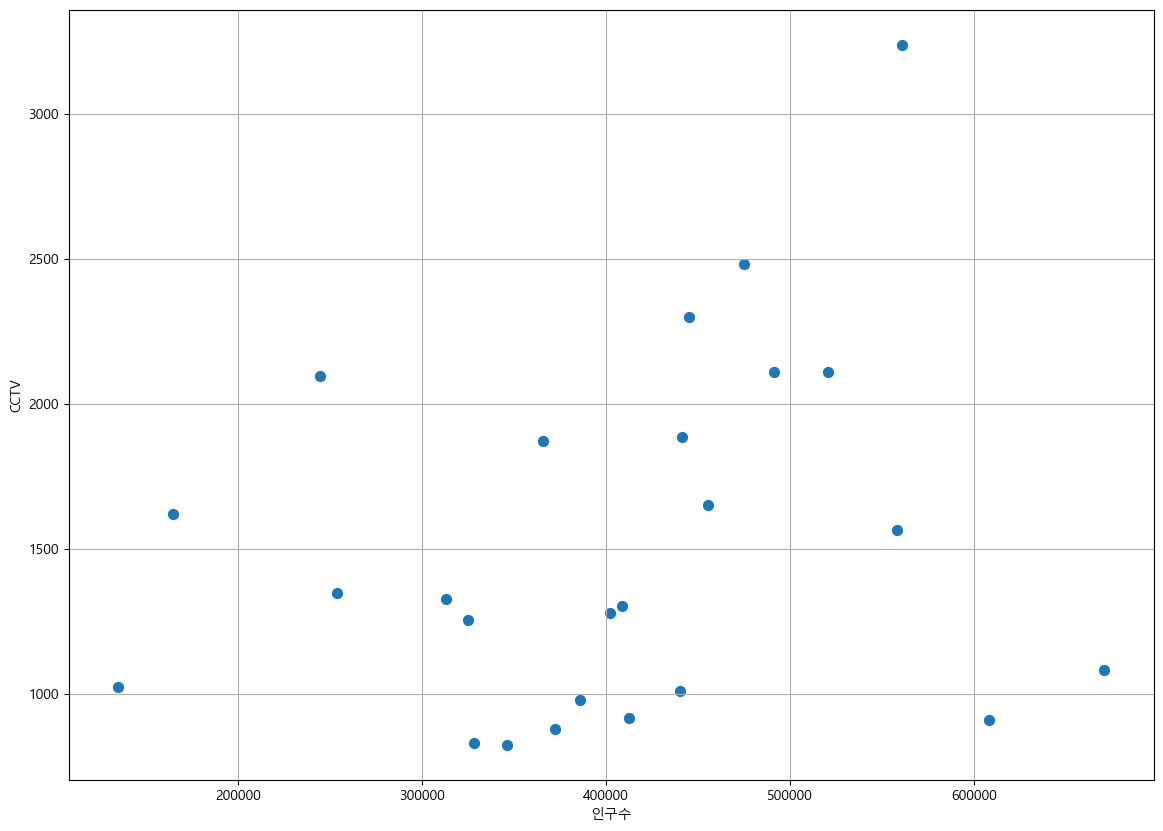

In [153]:
def drawGraph():
        
    plt.figure(figsize=(14, 10))
    plt.scatter(data_result["인구수"], data_result["소계"], s=50)
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.grid(True)
    plt.show()

drawGraph()

#### Numpy를 이용한 1차 직선 만들기
- np.polyfit(): 직선을 구성하기 위한 계수를 계산
- np.poly1d(): polyfit 으로 찾은 계수로 파이썬에서 사용할 수 있는 함수로 만들어주는 기능

In [154]:
import numpy as np

In [155]:
fpl = np.polyfit(data_result["인구수"], data_result["소계"], 1)
fpl

array([1.11155868e-03, 1.06515745e+03])

In [156]:
f1 = np.poly1d(fpl)
f1

poly1d([1.11155868e-03, 1.06515745e+03])

In [157]:
f1(400000)

1509.7809252413338

- 인구가 40만인 구에서 서울시의 전체 경향에 맞는 적당한 cctv 수는?

In [159]:
fx = np.linspace(100000, 700000, 100)
fx

array([100000.        , 106060.60606061, 112121.21212121, 118181.81818182,
       124242.42424242, 130303.03030303, 136363.63636364, 142424.24242424,
       148484.84848485, 154545.45454545, 160606.06060606, 166666.66666667,
       172727.27272727, 178787.87878788, 184848.48484848, 190909.09090909,
       196969.6969697 , 203030.3030303 , 209090.90909091, 215151.51515152,
       221212.12121212, 227272.72727273, 233333.33333333, 239393.93939394,
       245454.54545455, 251515.15151515, 257575.75757576, 263636.36363636,
       269696.96969697, 275757.57575758, 281818.18181818, 287878.78787879,
       293939.39393939, 300000.        , 306060.60606061, 312121.21212121,
       318181.81818182, 324242.42424242, 330303.03030303, 336363.63636364,
       342424.24242424, 348484.84848485, 354545.45454545, 360606.06060606,
       366666.66666667, 372727.27272727, 378787.87878788, 384848.48484848,
       390909.09090909, 396969.6969697 , 403030.3030303 , 409090.90909091,
       415151.51515152, 4

- 경향선을 그리기 위한 x 데이터 생성
- np.linspace(a, b, n): a부터 b까지 n개의 등간격 데이터 생성

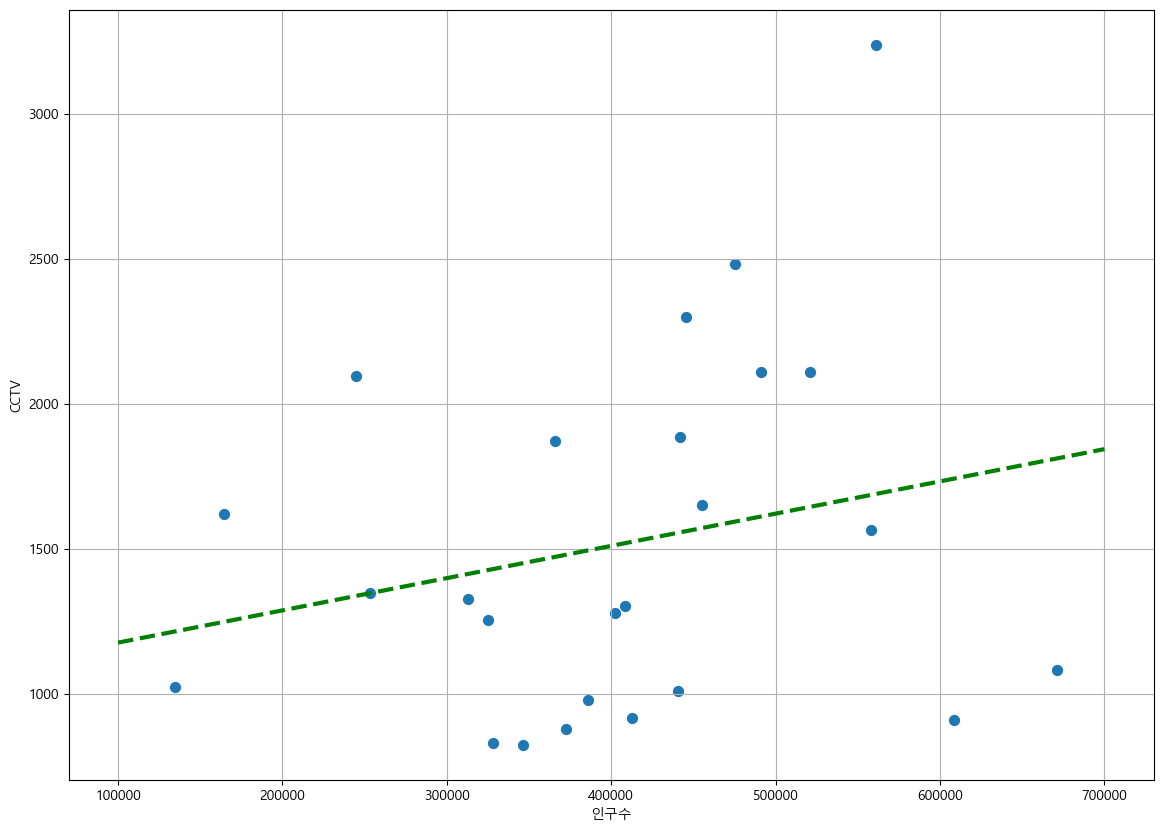

In [160]:
def drawGraph():
        
    plt.figure(figsize=(14, 10))
    plt.scatter(data_result["인구수"], data_result["소계"], s=50)
    plt.plot(fx, f1(fx), ls="dashed", lw=3, color="g")
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.grid(True)
    plt.show()

drawGraph()

## 7. 강조하고 싶은 데이터를 시각화해보자

### 그래프 다듬기
#### 경향과의 오차 만들기 
- 경향(trend)과의 오차를 만들자
- 경향은 f1 함수에 해당 인구를 입력
- f1(data_result["인구수"])


In [161]:
fp1 = np.polyfit(data_result["인구수"], data_result["소계"], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)


In [162]:
data_result.head(3)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352


In [163]:
data_result["오차"] = data_result["소계"] - f1(data_result["인구수"])

In [164]:
data_result.head(1)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.87122,11.596073,0.57713,1549.200326


In [165]:
# 경향과 비교해서 데이터의 오차가 많은 데이터를 계산

df_sort_f = data_result.sort_values(by="오차", ascending=False) # 내림차순
df_sort_t = data_result.sort_values(by="오차", ascending=True) # 오름차순

In [166]:
# 경향 대비 CCTV를 많이 가진 구
df_sort_f.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
양천구,2482,34.671731,475018,471154,3864,55234,0.813443,11.627770,0.522507,888.832166
용산구,2096,53.216374,244444,229161,15283,36882,6.252148,15.088118,0.857456,759.128697
서초구,2297,63.371266,445401,441102,4299,53205,0.965198,11.945415,0.515715,736.753199
은평구,2108,85.237258,491202,486794,4408,74559,0.897390,15.178888,0.429151,496.842700


In [167]:
# 경향 대비 CCTV를 적게 가진 구
df_sort_t.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578
송파구,1081,104.347826,671173,664496,6677,76582,0.994825,11.410173,0.161061,-730.205628
도봉구,825,246.638655,346234,344166,2068,53488,0.597284,15.448512,0.238278,-625.016861
중랑구,916,79.960707,412780,408226,4554,59262,1.103251,14.356800,0.221910,-607.986645
광진구,878,53.228621,372298,357703,14595,43953,3.920247,11.805865,0.235833,-600.988527


In [172]:
from matplotlib.colors import ListedColormap

# colormap 을 사용자 정의(user define)로 세팅
color_step = ["#e74c3c", "#2ecc71", "#95a9a6", "#2ecc71", "#3498db", "#3498db"]
my_cmap = ListedColormap(color_step)

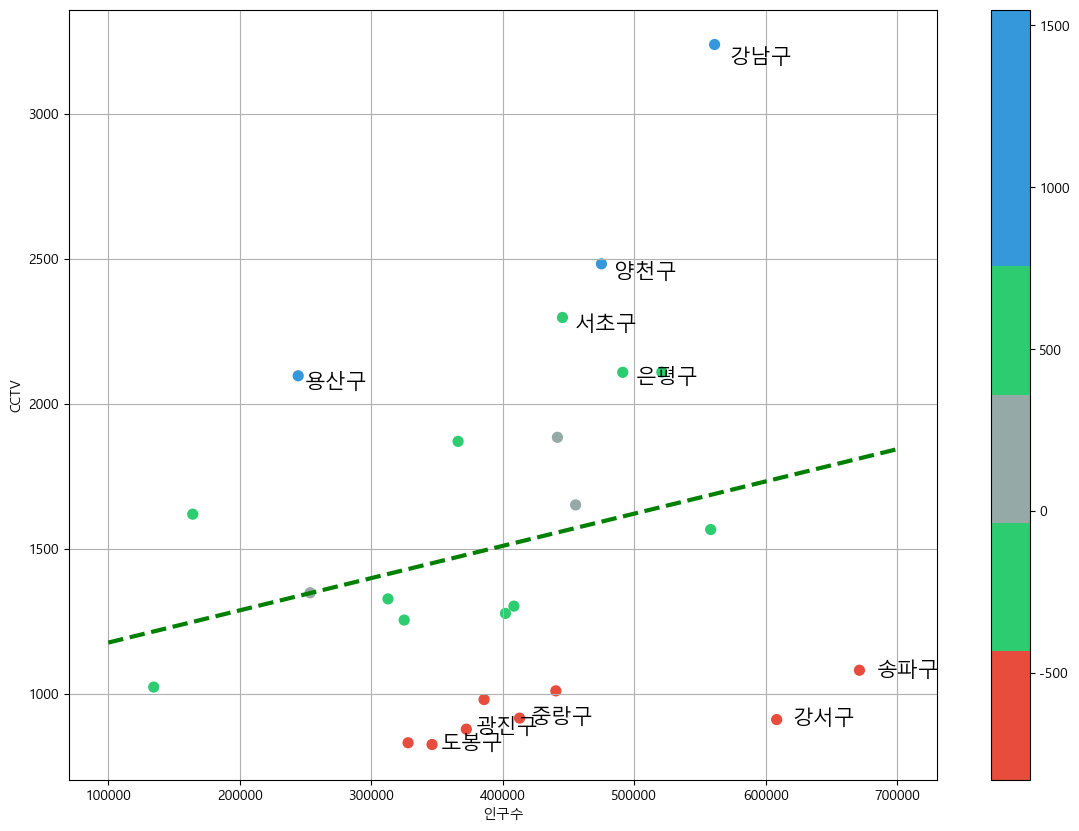

In [186]:
def drawGraph():
        
    plt.figure(figsize=(14, 10))
    plt.scatter(data_result["인구수"], data_result["소계"], s=50, c=data_result["오차"], cmap=my_cmap)
    plt.plot(fx, f1(fx), ls="dashed", lw=3, color="g")
    
    for n in range(5):
        # 상위 5개
        plt.text(
            df_sort_f['인구수'][n] * 1.02, # x 좌표
            df_sort_f['소계'][n] * 0.98,  # y 좌표
            df_sort_f.index[n],           # title
            fontsize=15,
        )
        
        # 하위 5개
        plt.text(
            df_sort_t['인구수'][n] * 1.02,
            df_sort_t['소계'][n] * 0.98,
            df_sort_t.index[n],
            fontsize=15,
        )
    
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.colorbar()
    plt.grid(True)
    plt.show()

drawGraph()

In [176]:
df_sort_f.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
양천구,2482,34.671731,475018,471154,3864,55234,0.813443,11.627770,0.522507,888.832166
용산구,2096,53.216374,244444,229161,15283,36882,6.252148,15.088118,0.857456,759.128697
서초구,2297,63.371266,445401,441102,4299,53205,0.965198,11.945415,0.515715,736.753199
은평구,2108,85.237258,491202,486794,4408,74559,0.897390,15.178888,0.429151,496.842700


In [177]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358,-544.642322
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352,-598.750923
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854,464.799395


In [178]:
data_result["인구수"][0]

561052

In [179]:
data_result["소계"][0]

3238

In [180]:
data_result.index[0]

'강남구'

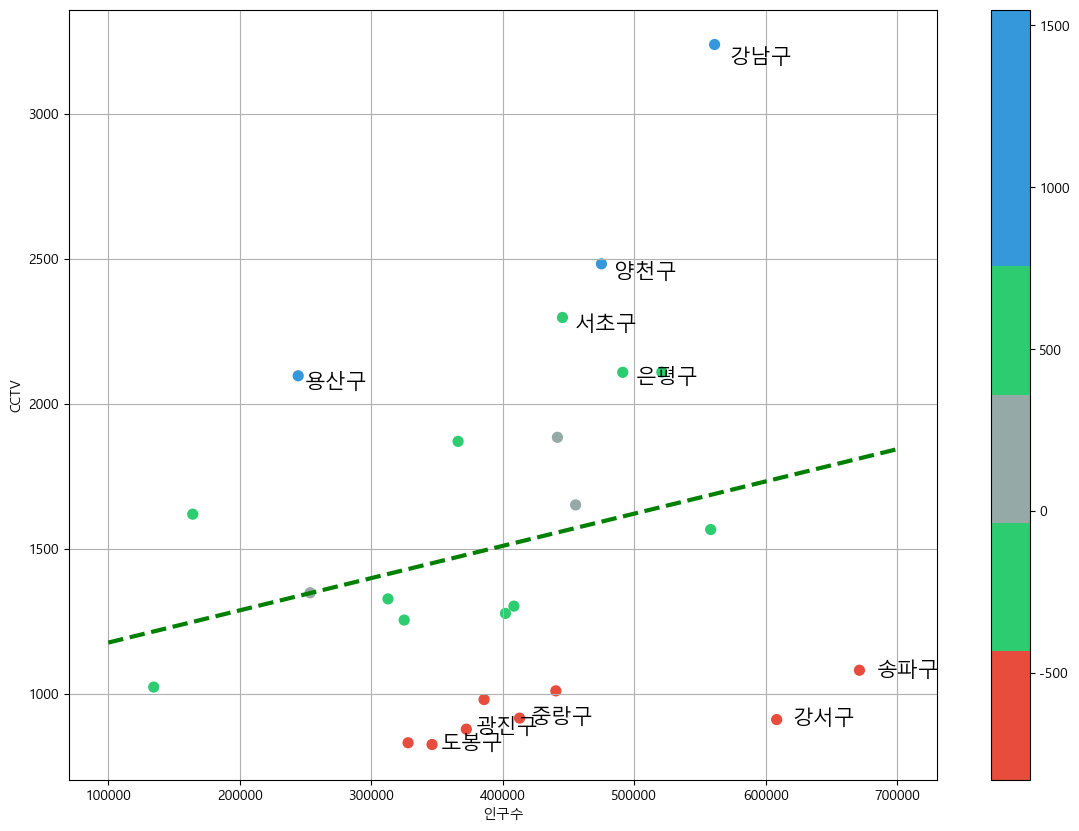

In [187]:
def drawGraph():
        
    plt.figure(figsize=(14, 10))
    plt.scatter(data_result["인구수"], data_result["소계"], s=50, c=data_result["오차"], cmap=my_cmap)
    plt.plot(fx, f1(fx), ls="dashed", lw=3, color="g")
    
    for n in range(5):
        # 상위 5개
        plt.text(
            df_sort_f['인구수'][n] * 1.02, # x 좌표
            df_sort_f['소계'][n] * 0.98,  # y 좌표
            df_sort_f.index[n],           # title
            fontsize=15,
        )
        
        # 하위 5개
        plt.text(
            df_sort_t['인구수'][n] * 1.02,
            df_sort_t['소계'][n] * 0.98,
            df_sort_t.index[n],
            fontsize=15,
        )
    
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.colorbar()
    plt.grid(True)
    plt.show()

drawGraph()

In [188]:
data_result.to_csv("../data/01. CCTV_result.csv", sep=",", encoding="utf-8")